# GENDER AND STOCK MARKET PARTICIPATION
_Karl Stavem_

## Table of Contents
1.  [Motivation and Problem Statement](#motivation)
1.  [Research Questions and Hypotheses](#rq)
1.  [Background and Related Work](#brr)
1.  [Data](#dd)
1.  [A Note On Terminology](#terminology)
1.  [Methodology](#methodology)
1.  [Data Preprocessing](#dpp)
1.  [Findings](#findings)
1.  [Discussion](#discussion)
1.  [Conclusion](#conclusion)

<span id="motivation"/>
    
### Motivation and Problem Statement
There is a significant and well-established [gender pay gap](https://www.pewresearch.org/fact-tank/2019/03/22/gender-pay-gap-facts/) in the workplace.  However, a large portion of individual wealth comes from investment in the stock market and accumulated retirement funds.   The goal of this study is to explore participation in the stock market and examine at how that may differ across gender lines.

<span id="rq"/>

### Research Questions and Hypotheses

There are two specific questions that I will address in this analysis:

- _Q 1:  Do women participate in the stock market at a lower rate than men?_
- _Q 2.1:  What are they key factors that affect stock market participation?_  
- _Q 2.2:  Do these key factors disproportionally affect women?_

My initial hypothesis at the begining of this study was that women participate in the stock market at a lower rate than men.  I believed that this drop in participation would be driven less by differences in attitudes or dispositions, and instead be driven by income and employment.


<span id="brr" />

### Background and Related Work
Many financial advisory firms have conducted independent research into these issues in the past.   For example Northwestern Mutual has routinely [published findings](https://news.northwesternmutual.com/planning-and-progress-2019) outlining general attitudes and bevahiors around money and investing.   Addtionally, FINRA publishes results from the National Financial Capability Study on [their website](https://www.usfinancialcapability.org/results.php?region=US) every three years.  However, most of these studies do not specifically focus on gender.

<span id="dd" />

### Data


#### Descrption
The primary dataset used to address these questions is the _2018 National Financial Capability Study (NFCS)_, funded by the FINRA Investor Education Foundation.  The NFCS is a longitudinal survey conducted across the United States every three years.   The goal of the survey is to benchmark key indicators of financial capability in U.S. households and evaluate how these indictors vary by regions, attitudes, and demographics.  While this is a longitudinal survey that has been conducted every three years since 2009, my analysis focuses exclusively on the 2018 dataset.  While the FINRA Investor Education Foundation publishes its own findings on this data, it has made the datasets, questionaires, and documents available to outside researchers.

#### Dimensions
The 2018 NFCS contains responses from roughly 27,000 households across all 50 states.  Each respondent provided answers to 127 different questions.   All responses have been numericall encoded into a single .csv file.


#### Access

The 2018 NFCS dataset is freely available online and is subject to FINRA's [terms of use](https://www.usfinancialcapability.org/terms.php).  Full details and descrptions can be found on the on the [Data and Downloads](https://www.usfinancialcapability.org/downloads.php) page of the US Financial Capability website.  The primrary dataset used in this exploration is titled, _2018 State-by-State Survey — Respondent-Level Data, Comma delimited Excel file (.csv)_ and it may be downloaded in a .zip file directly from FINRA's website using [this link](https://www.usfinancialcapability.org/downloads/NFCS_2018_State_by_State_Data_Excel.zip).  This project already contains the full 2018 NFCS dataset, which can be viewed directly here: [\"NFCS 2018 State Data 190603.csv\"](raw_data/NFCS%202018%20State%20Data%20190603.csv). 

<span id="terminology" />

### A Note on Terminology

It is important to acknowledge the usage of specific terms like _gender_ and _sex_ in this analysis.  Regrettably, the NFCS dataset uses terms like _gender_ and _sex_ interchangebly as well as terms like _woman_ and _female_.   Additionally, all survey respondents were required to self-identify strictly as either _male_ or _female_ with no alternative for non-binary designations.   As a result, the findings presented in this study make the same adjustments.   Unfortunately, all subsequent analysis will use these words interchangebly and all findings are based on the assumption that respondents fall neatly into one of two distinct gender groups, either male or female.

<span id="methodology" />

### Methodology

blah blah blah blah



<span id="dpp"/>

### Data Preprocessing

Each respondent in this survey was asked 127 individual questions; however, not all of the questions posed are useful to this analysis.   The following section will download the raw data from the website and create a refined dataframe to work with.

First, import all necessary libraries for processing and analysing the data.

In [1]:
# import libraries for data aquisition and processing
import pandas as pd
import numpy as np
import requests, zipfile, io

# import libraries for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# import libraries for statistical tests
import math
from statsmodels.stats.proportion import proportions_ztest
import statsmodels.formula.api as smf
import statsmodels.api as sm

Since the data on the FINRA website is in zipped form, I have created a method to extract the raw data into the _raw_data_ directory.  Additionally, since there are multiple datasets available on the website, this will make future analysis easier.

In [2]:
def get_data(zip_file_url):
    """
    Input: Website to extract zip file.
    Output:  Extracted data in '/raw_data' folder
    """
    import requests, zipfile, io
    r = requests.get(zip_file_url)
    if r.ok:
        print('Request Succesful.')
    else:
        print('Error submitting request.')
        
    z = zipfile.ZipFile(io.BytesIO(r.content))
    z.extractall('./raw_data')

Now we can call the method to save the files in the appropriate place.

In [3]:
#%%capture

# download state by state data, store this in a data frame
BASE_URL = 'https://www.usfinancialcapability.org/downloads/'

# populate the list of data sets to download from the site
file_list = ['NFCS_2018_State_by_State_Data_Excel.zip']

# call the function for each file in the list
for filename in file_list:
    get_data(zip_file_url = BASE_URL + filename)

Request Succesful.


We will store this data as a pandas dataframe.

In [4]:
# read the newly aquired data into a dataframe
raw_df = pd.read_csv('raw_data/NFCS 2018 State Data 190603.csv')

# Check the import results.
display(raw_df.head())

,NFCSID,STATEQ,CENSUSDIV,CENSUSREG,A3,A3Ar_w,A3B,A4A_new_w,A5_2015,A6,...,M42,M6,M7,M8,M31,M9,M10,wgt_n2,wgt_d2,wgt_s3
0,2018010001,48,9,4,2,5,11,1,5,4,...,,1,3,98,98,98,1,0.683683,0.519642,1.095189
1,2018010002,10,5,3,2,2,8,1,6,1,...,,1,3,98,3,1,98,0.808358,2.516841,0.922693
2,2018010003,44,7,3,2,2,8,1,6,1,...,,1,1,98,98,1,98,1.021551,1.896192,0.671093
3,2018010004,10,5,3,2,1,7,1,6,2,...,7,98,98,4,4,2,98,0.808358,2.516841,0.922693
4,2018010005,13,8,4,1,2,2,1,6,1,...,,1,3,98,2,1,98,0.448075,0.614733,1.232221


Since there are about 27,000 respondents answering 127 questions each, we should see a dataset of roughly this size.

In [5]:
raw_df.shape

(27091, 128)

Since there are 127 questions in the survey and none of them have meaningful names, the function below will assign more informative headers to key columns in the dataset.  Since not all 127 questions are relevant to this research, the extranneous columns can be dropped.

In [6]:
def set_column_names(c):
    switcher = {
        'NFCSID':'id', 
        'A3':'gender', 
        'A5_2015':'education', 
        'A8':'income', 
        'A9':'work_status',
        'A14':'investment_knowledge',
        'J1':'financial_satisfaction_score',
        'J2':'risk_tolerance',
        'J3':'income_to_debt',
        'J4':'difficult_to_pay_bills',
        'J8':'know_retirement_amount',
        'J20':'confidence_paying_unexpected_need',
        'J32':'current_credit_record',
        'J33_1':'worry_about_retirement',
        'J33_40':'finances_makes_me_anxious',
        'J33_41':'finances_makes_me_stressed',
        'B2':'savings_account',
        'B40':'comfort_asking_questions',
        'C1_2012':'employer_provided_retirement_account',
        'C4_2012':'self_retirement_account',
        'B14':'other_investment_accounts',
        'F2_3':'minimum_credit_card_payement_only',
        'G23':'too_much_debt',
        'M1_1':'good_at_daily_financial_matters',
        'M1_2':'good_at_math',
        'M4':'financial_knowledge',
        'M40':'taken_financial_education',
        'M41':'how_many_hours_of_financial_education'
    }
    return switcher.get(c, "column_to_drop")

# create a new copy of the dataframe to manipulate
df = raw_df

# call the function above to rename columns
df.rename(columns=lambda x: set_column_names(x), inplace=True)

Now we are free to drop the remaining columns that will not be used in this analysis.

In [7]:
df.drop(['column_to_drop'], axis=1, inplace=True)

There are several blank entries in the dataframe.   It is easier to work with NaN, so we will edit those cells. Additionally, there are quite a few answers coded as _Unknown_ or _Chose Not To Respond_.  These are not particularly informative for this analysis, so we will remove those data elements as well.

In [8]:
df = df.replace(r'^\s*$', np.nan, regex=True)
df = df.replace(98, np.nan, regex=True)
df = df.replace(99, np.nan, regex=True)
df = df.replace('98', np.nan, regex=True)
df = df.replace('99', np.nan, regex=True)

Since all the data is numerically encoded, we will convert all columns into integer data types.   Since 0 is not a valid answer for any of the survey questions, we will fill in all blank and missing data with a 0.

In [9]:
# convert missing data to zeros
df = df.fillna(0)

# coerce all columns in the df to integer
cols =['id', 'gender', 'education', 'income', 'work_status','investment_knowledge',
      'financial_satisfaction_score','risk_tolerance','income_to_debt','difficult_to_pay_bills',
      'know_retirement_amount','confidence_paying_unexpected_need','current_credit_record','worry_about_retirement',
      'finances_makes_me_anxious','finances_makes_me_stressed','savings_account','comfort_asking_questions',
      'employer_provided_retirement_account','self_retirement_account','other_investment_accounts','minimum_credit_card_payement_only',
      'too_much_debt','good_at_daily_financial_matters','good_at_math','financial_knowledge','taken_financial_education',
      'how_many_hours_of_financial_education']

df[cols] = df[cols].apply(lambda x :pd.to_numeric(x,errors='coerce').astype(int),axis=0)

# check to ensure all columns are integers now
df.dtypes

id                                       int64
gender                                   int64
education                                int64
income                                   int64
work_status                              int64
investment_knowledge                     int64
financial_satisfaction_score             int64
risk_tolerance                           int64
income_to_debt                           int64
difficult_to_pay_bills                   int64
know_retirement_amount                   int64
confidence_paying_unexpected_need        int64
current_credit_record                    int64
worry_about_retirement                   int64
finances_makes_me_anxious                int64
finances_makes_me_stressed               int64
savings_account                          int64
comfort_asking_questions                 int64
employer_provided_retirement_account     int64
self_retirement_account                  int64
other_investment_accounts                int64
minimum_credi

Preview the results before moving forward.

In [10]:
df.head()

,id,gender,education,income,work_status,investment_knowledge,financial_satisfaction_score,risk_tolerance,income_to_debt,difficult_to_pay_bills,...,employer_provided_retirement_account,self_retirement_account,other_investment_accounts,minimum_credit_card_payement_only,too_much_debt,good_at_daily_financial_matters,good_at_math,financial_knowledge,taken_financial_education,how_many_hours_of_financial_education
0,2018010001,2,5,1,6,0,1,1,3,1,...,1,2,0,0,7,1,6,2,2,0
1,2018010002,2,6,5,2,1,4,3,3,2,...,1,1,1,2,1,7,6,5,2,0
2,2018010003,2,6,4,2,3,1,1,2,1,...,1,2,2,1,7,1,1,2,2,0
3,2018010004,2,6,5,2,3,8,10,2,3,...,0,0,2,0,0,6,6,0,2,3
4,2018010005,1,6,3,2,1,6,5,3,3,...,1,2,2,2,4,7,4,4,2,0


Looking at an initial breakdown of the data, there are slightly more female respondents than male respondents.   About 56% of respondents are women and 44%  of all respondents are men.

Female    15135
Male      11956
Name: cat_gender, dtype: int64


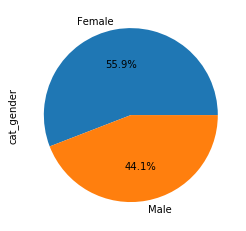

In [11]:
# create a clean categorical column for gender
df['cat_gender'] = df['gender'].apply(lambda x: 'Male' if x == 1 else 'Female')

# plot the totals in a quick pie chart
g1 = df['cat_gender'].value_counts().plot.pie(autopct="%.1f%%")
fig = g1.get_figure()
fig.savefig('./figures/g1.png')

# print total counts for each group
print(df['cat_gender'].value_counts())

<span id="findings" />
          
          
### Findings

#### Q 1: Do women participate in the stock market at a lower rate than men?
This analysis begins by addressing the question of whether women participate in the stock market at a lower rate than men.  Since all of these responses are numerically encoded, it may be useful to create cleaner categorical columns with more informative entries.  The following code performs this task.

In [12]:
# who has access to an investment account

# create a clean column with labels
def set_investment_accounts(score):
    if score==1:
        return 'Yes'
    elif score==2:
        return 'No'
    else:
        return "Unknown"

# who has employer-provided account, other retirement, or other investments        
df['cat_employer_provided_retirement_account'] = df.apply(lambda x: set_investment_accounts(x['employer_provided_retirement_account']),axis=1)
df['cat_self_retirement_account'] = df.apply(lambda x: set_investment_accounts(x['self_retirement_account']),axis=1)
df['cat_other_investment_accounts'] = df.apply(lambda x: set_investment_accounts(x['other_investment_accounts']),axis=1)

In order to be considered a participant in the stock market, a respondent must meet _at least one_ of the following criteria:  
- Hold an employer-provided retirement account.
- Hold a retirement account not provided by an employer.
- Hold any investments in stocks, bonds, mutual funds, or other securities outside of a retirement account.

We can create a categorical column that tracks this information.

In [13]:
# create a clean column with labels
def set_participant(account1, account2, account3):
    if 'Yes' in {account1, account2, account3}:
        return 'Yes'
    else:
        return "No"
    
def set_participant_numerical(account1, account2, account3):
    if 'Yes' in {account1, account2, account3}:
        return 1
    else:
        return 0
        
df['cat_market_participant'] = df.apply(lambda x: set_participant(x['cat_employer_provided_retirement_account'], x['cat_self_retirement_account'], x['cat_other_investment_accounts']),axis=1)
df['market_participant'] = df.apply(lambda x: set_participant_numerical(x['cat_employer_provided_retirement_account'], x['cat_self_retirement_account'], x['cat_other_investment_accounts']),axis=1)


We can now graph this data and examine the relationship.

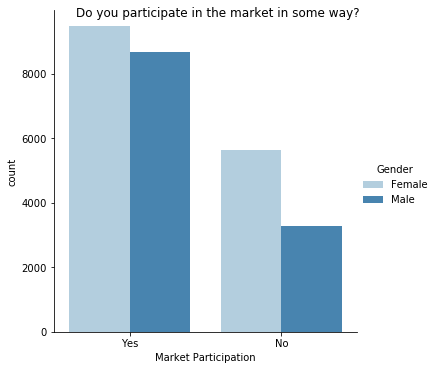

In [14]:
# plot the gender distribution
g2 = sns.catplot(x="cat_market_participant", 
            kind="count",
            hue='cat_gender',
            data=df,
            order=["Yes", "No"],
            palette=("Blues"))

# set labels
g2.fig.suptitle('Do you participate in the market in some way?') 
g2.set(xlabel='Market Participation', )
g2._legend.set_title("Gender")

# save output
g2.savefig('./figures/g2.png')

There are a higher number of female respondents that participate in the market.   However, there are more females in our respondent pool. These results must be normalized against the total population in each group.

In [15]:
print(df[(df['cat_gender'] =='Female')][['cat_gender','cat_market_participant']].value_counts(normalize=True))
print(df[(df['cat_gender'] =='Male')][['cat_gender','cat_market_participant']].value_counts(normalize=True))

cat_gender  cat_market_participant
Female      Yes                       0.62775
            No                        0.37225
dtype: float64
cat_gender  cat_market_participant
Male        Yes                       0.725828
            No                        0.274172
dtype: float64


72% of male respondents participate in the market in some way, while only 62% of female respondents particpate.  To examine whether or not this is statistically significant, a simple two-sample Z-test for a proportion will be run.  In this case the null hypothesis is that the proportion should be equal for the two groups.  The alternative hypothesis is that the proportion of market participants is less for women than it is for men.

In [16]:
# set significance level
alpha = 0.025

# compare market participation in both populations
female_participants, female_respondents = (9501, 15135)
male_participants, male_respondents = (8678, 11956)

participants = np.array([female_participants, male_participants])
respondents = np.array([female_respondents, male_respondents])

# run our test
stat, p_val = proportions_ztest(count=participants, nobs=respondents,  alternative='smaller')

# check results
print('Z-Statistic: %0.3f, \nP-Value: %0.3f, \nConclusion:' % (stat, p_val))
if p_val < alpha:
    print ("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")


Z-Statistic: -17.061, 
P-Value: 0.000, 
Conclusion:
Reject the null hypothesis.


It is clear from the results that this is a signifcant difference between the two proportions.   Based on this sample, it appears women participate in the market at a lower rate then men.  Perhaps a clearer way to quantify this difference is to run a logistic regression with `market_participant` as the target variable and `gender` as the predictor.

In [17]:
formula = 'market_participant ~ C(gender)'

model = smf.glm(formula = formula, data=df, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:     market_participant   No. Observations:                27091
Model:                            GLM   Df Residuals:                    27089
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17014.
Date:                Mon, 14 Dec 2020   Deviance:                       34028.
Time:                        20:15:23   Pearson chi2:                 2.71e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.9736      0.021     47.

Again, there is highly significant p-value for the categorical variable of gender.  Exponentiating the coefficient allows for a clearer interpretation.

In [18]:
odds = 1 - math.exp(result.params['C(gender)[T.2]'])
print(odds)

0.36299655819951526


With this result we can say that the odds of participating in the market are lower by about 36% when a respondent is a female instead of a male.

#### Q 2.1: What are they key factors that affect stock market participation?

In this section I perform an exploratory data analysis to identify some of the key factors driving stock market participation.   The table below presents a correlation table for all columns compared to `market_participant`.

In [19]:
df[df.columns[1:]].corr()['market_participant'][:].sort_values(ascending=False)

market_participant                       1.000000
income                                   0.525258
minimum_credit_card_payement_only        0.439276
current_credit_record                    0.434949
financial_satisfaction_score             0.352035
difficult_to_pay_bills                   0.326952
financial_knowledge                      0.303532
education                                0.297341
comfort_asking_questions                 0.284859
risk_tolerance                           0.270361
good_at_daily_financial_matters          0.261787
investment_knowledge                     0.208074
good_at_math                             0.205801
how_many_hours_of_financial_education    0.080058
taken_financial_education                0.037624
income_to_debt                          -0.065875
other_investment_accounts               -0.075332
worry_about_retirement                  -0.084199
work_status                             -0.096174
gender                                  -0.103653


`Income` appears to be strongly correlated with market participation; however, not all of the variables listed above contain ordinal data so they will not be reflected properly.   Given that income appears to be a key factor, I suspect that work status is also strongly correlated.   In order investigate this relationship, the column needs to be modified slightly. 

In [20]:
# create a clean column with labels
def set_work_status(score):
    switcher = {
        1: "Self-employed",
        2: "Work full-time for an employer",
        3: "Work part-time for an employer",
        4: "Homemaker",
        5: "Full-time student",
        6: "Permanently sick, disabled, or unable to work",
        7: "Unemployed or temporarily laid off",
        8: "Retired",
        99: "Unknown"
    }
    return switcher.get(score, "Unknown")
        
df['cat_work_status'] = df.apply(lambda x: set_work_status(x['work_status']),axis=1)

We can graph this variable and it's relationship to market participation.

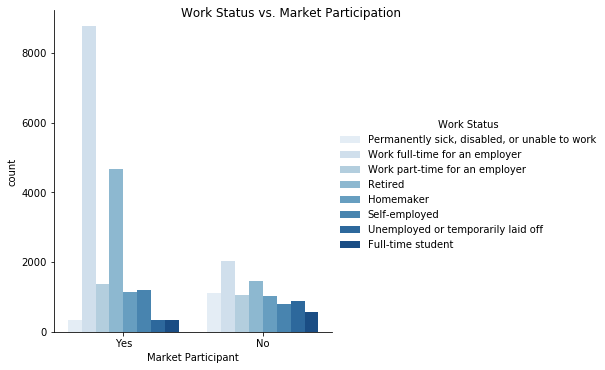

In [21]:
# plot the distribution
g3 = sns.catplot(x="cat_market_participant", 
            kind="count", 
            data=df,
            hue="cat_work_status",
            palette=("Blues")
           )
g3.set(xlabel='Market Participant', )
g3._legend.set_title("Work Status")
g3.fig.suptitle('Work Status vs. Market Participation') 
g3.savefig('./figures/g3.png')

From the graph it is clear that an overwhelming majority of market participants hold full time jobs or are retired.   Using a similar method, we can investigate other columns in the dataset.

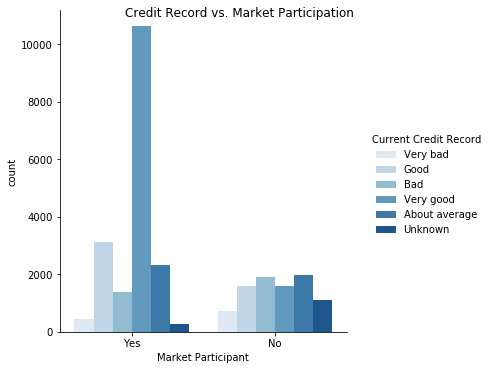

In [22]:
def set_credit_record(score):
    switcher = {
        1: "Very bad",
        2: "Bad",
        3: "About average",
        4: "Good",
        5: "Very good",
        98: "Don’t know",
        99: "Prefer not to say"
    }
    return switcher.get(score, "Unknown")
        
df['cat_current_credit_record'] = df.apply(lambda x: set_credit_record(x['current_credit_record']),axis=1)


# plot the distribution
g4 = sns.catplot(x="cat_market_participant", 
            kind="count", 
            data=df,
            hue="cat_current_credit_record",
            palette=("Blues")
           )
g4.set(xlabel='Market Participant', )
g4._legend.set_title("Current Credit Record")
g4.fig.suptitle('Credit Record vs. Market Participation') 
g4.savefig('./figures/g4.png')

Individuals with better credit records appear to have a much higher liklihood of investing in the stock market.   However, credit records are highly correlated with income and work status.  Looking at some other variables not related to income:

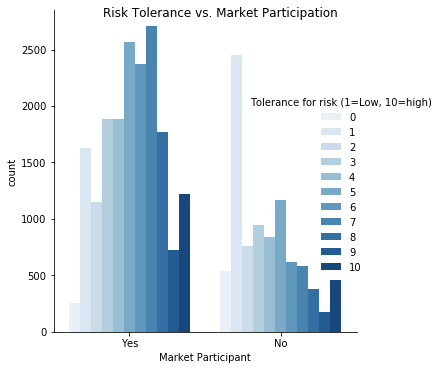

In [23]:
# plot the distribution
g5 = sns.catplot(x="cat_market_participant", 
            kind="count", 
            data=df,
            hue="risk_tolerance",
            palette=("Blues")
           )
g5.set(xlabel='Market Participant', )
g5._legend.set_title("Tolerance for risk (1=Low, 10=high)")
g5.fig.suptitle('Risk Tolerance vs. Market Participation') 
g5.savefig('./figures/g5.png')

From the graph above, it is clear that individuals with no tolerance for risk do not participate in the stock market.  However, the correlation is not as strong as with some of the other income-related categories.  Individuals across the spectrum of risk tolerance are participating in the market.  Quickly looking at several other categories:

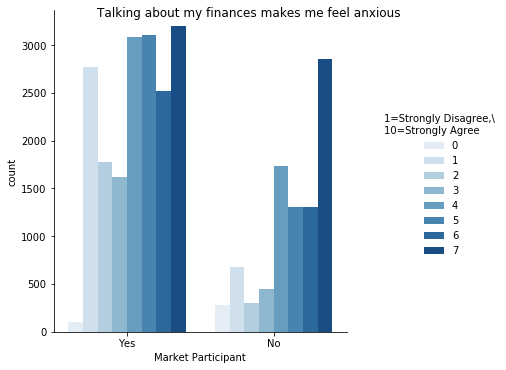

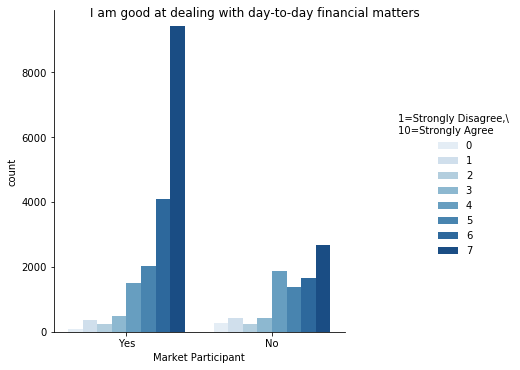

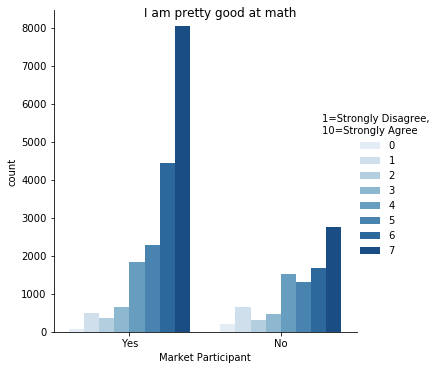

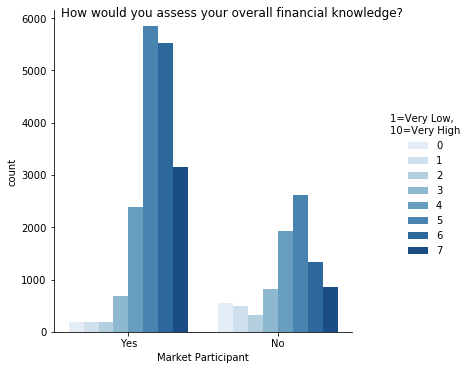

In [24]:
# plot the distribution
g6 = sns.catplot(x="cat_market_participant", 
            kind="count", 
            data=df,
            hue="finances_makes_me_anxious",
            palette=("Blues")
           )
g6.set(xlabel='Market Participant', )
g6._legend.set_title("1=Strongly Disagree,\ \n10=Strongly Agree")
g6.fig.suptitle('Talking about my finances makes me feel anxious') 
g6.savefig('./figures/g6.png')

# plot the distribution
g7 = sns.catplot(x="cat_market_participant", 
            kind="count", 
            data=df,
            hue="good_at_daily_financial_matters",
            palette=("Blues")
           )
g7.set(xlabel='Market Participant', )
g7._legend.set_title("1=Strongly Disagree,\ \n10=Strongly Agree")
g7.fig.suptitle('I am good at dealing with day-to-day financial matters') 
g7.savefig('./figures/g7.png')

g8 = sns.catplot(x="cat_market_participant", 
            kind="count", 
            data=df,
            hue="good_at_math",
            palette=("Blues")
           )
g8.set(xlabel='Market Participant', )
g8._legend.set_title("1=Strongly Disagree, \n10=Strongly Agree")
g8.fig.suptitle('I am pretty good at math') 
g8.savefig('./figures/g8.png')

g9 = sns.catplot(x="cat_market_participant", 
            kind="count", 
            data=df,
            hue="financial_knowledge",
            palette=("Blues")
           )
g9.set(xlabel='Market Participant', )
g9._legend.set_title("1=Very Low, \n10=Very High")
g9.fig.suptitle('How would you assess your overall financial knowledge?') 
g9.savefig('./figures/g9.png')

From the collection of graphs above if at appears as though the following features play a key role whether or not an individual participates in the market:  
- Factors related to income (work status, income, credit record, etc).
- General comfort dealing with day-to-day financial matters.
- General math skills.

I will examine some of these key features in the next section.

#### Q 2.2: Do these key factors disproportionally affect women?

Looking at the general comfort with day-to-day financial matters, as well as general math skills, there is almost no difference in the reported scores between men and women.

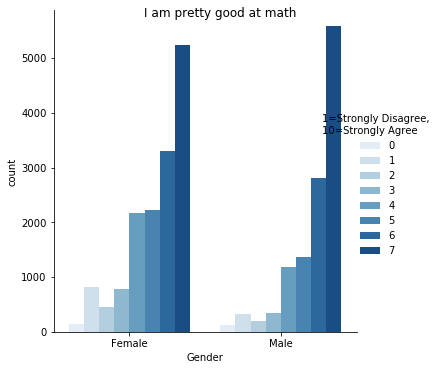

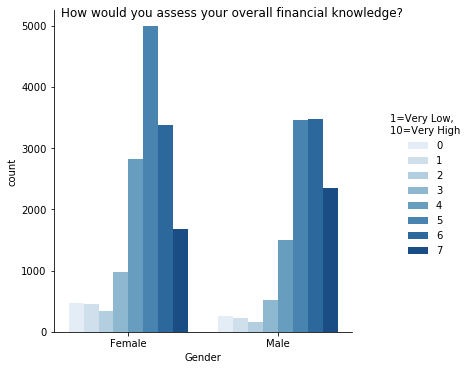

In [25]:
g10 = sns.catplot(x="cat_gender", 
            kind="count", 
            data=df,
            hue="good_at_math",
            palette=("Blues")
           )
g10.set(xlabel='Gender', )
g10._legend.set_title("1=Strongly Disagree, \n10=Strongly Agree")
g10.fig.suptitle('I am pretty good at math') 
g10.savefig('./figures/g10.png')

g11 = sns.catplot(x="cat_gender", 
            kind="count", 
            data=df,
            hue="financial_knowledge",
            palette=("Blues")
           )
g11.set(xlabel='Gender', )
g11._legend.set_title("1=Very Low, \n10=Very High")
g11.fig.suptitle('How would you assess your overall financial knowledge?') 
g11.savefig('./figures/g11.png')

However, looking at employment types illustrates a vast difference between the two genders.  Since the vast majority of employer provided retirement accounts are only available to full-time employees, dividing up the responses by this feature is helpful.

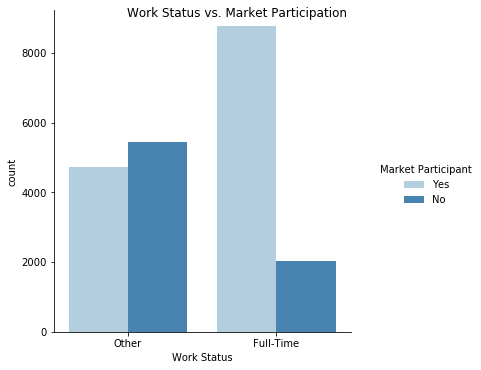

In [26]:
df['cat_ft_status'] = df['work_status'].apply(lambda x: 'Full-Time' if x == 2 else 'Other')

g12 = sns.catplot(x="cat_ft_status", 
            kind="count", 
            data=df.where(df['work_status'] != 8),
            hue="cat_market_participant",
            palette=("Blues")
           )

g12.set(xlabel='Work Status', )
g12._legend.set_title("Market Participant")
g12.fig.suptitle('Work Status vs. Market Participation') 
g12.savefig('./figures/g12.png')

It's clear that an overwhelming majority of market participants are full time employees.  Looking at the number of full-time employees split along gender lines:

In [27]:
print(df[(df['cat_gender'] =='Female')][['cat_gender','cat_ft_status']].value_counts(normalize=True))
print(df[(df['cat_gender'] =='Male')][['cat_gender','cat_ft_status']].value_counts(normalize=True))

cat_gender  cat_ft_status
Female      Other            0.661711
            Full-Time        0.338289
dtype: float64
cat_gender  cat_ft_status
Male        Other            0.524925
            Full-Time        0.475075
dtype: float64


Only 33.8% of all female respondents were considered full-time employees, compared to nearly half of the male respondents.  Above all other features, the discrepancy in full-time employement appears to account for the greatest variance in market participation between genders.

<span id="discussion" />

### Discussion

<span id="conclusion" />

### Conclusion
blah blah blah

<span id="questions"/>

